In [1]:
import model2 as md
import initials as ini
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
plt.rc("text", usetex=False) 
plt.rc("mathtext", fontset="cm")
plt.rc("font", family="serif", serif="cmr10", size=12)
plt.rc("axes.formatter", use_mathtext = True)

In [2]:

def run_simul(pdC,N,L,alpha,lmb,DTh,DT,v0,gamma,dt,steps,init,seed):
    step = 1
    Xs = np.zeros((steps,N,2))
    Ths = np.zeros((steps,N))
    Xs[0,:,:], Ths[0,:] = ini.init_X_Th(N,L,init,seed)
    while step < steps:
        tprev = step - 1
        update = md.update_X_Th(Xs[step-1,:,:], Xs[tprev,:,:], Ths[step-1,:], pdC,
        N,L,alpha,lmb,DTh,DT,v0,gamma,dt,step)
        Xs[step,:,:] = update[0]
        Ths[step,:] = update[1]
        if step % 1000 == 0:
            print(step)
        step += 1
    return Xs, Ths


def plot_curve(Xs,Ths,N,L,alpha,lmb,DTh,DT,v0,gamma,dt,steps,init,tag,seed=None):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlim(0,L)
    ax1.set_ylim(0,L)
    for i in range(N):
        ax1.plot(Xs[0::100,i,0],Xs[0::100,i,1],c=cm.hsv((i)/(N)),zorder=2*i)
        ax1.arrow(Xs[200,i,0],Xs[200,i,1],Xs[300,i,0]-Xs[200,i,0],Xs[300,i,1]-Xs[200,i,1],color=cm.hsv((i)/(N)),head_width=0.02,head_length=0.02,zorder=2*i+1)
        if lmb > 0:
            ax1.arrow(Xs[11900,i,0],Xs[11900,i,1],Xs[11999,i,0]-Xs[11900,i,0],Xs[11999,i,1]-Xs[11900,i,1],color=cm.hsv((i)/(N)),head_width=0.02,head_length=0.02,zorder=2*i+1)
    plt.show()

In [3]:
L = 1.0
alpha = 1.0
DTh = 1.0
v0 = 7.0
gamma = 300.0
dt = 1e-5
steps = 14000
init = "sunflower"
eps1 = 1e-4

tag = "pdC=0"

seeds = [5411]

In [4]:
# function for a fixed background chemical, zero for Figures 2a,b
def pdC1(t,Xs):
    N = Xs.shape[0]
    dCs = np.zeros((N,2))
    dCs[:,0] = 0*Xs[:,0]
    dCs[:,1] = 0*Xs[:,1]
    return dCs

/Users/oscardewit/ants_repo/SDE_particle/model2.py:16: RuntimeWarning: divide by zero encountered in divide
  C = np.divide(1,E)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


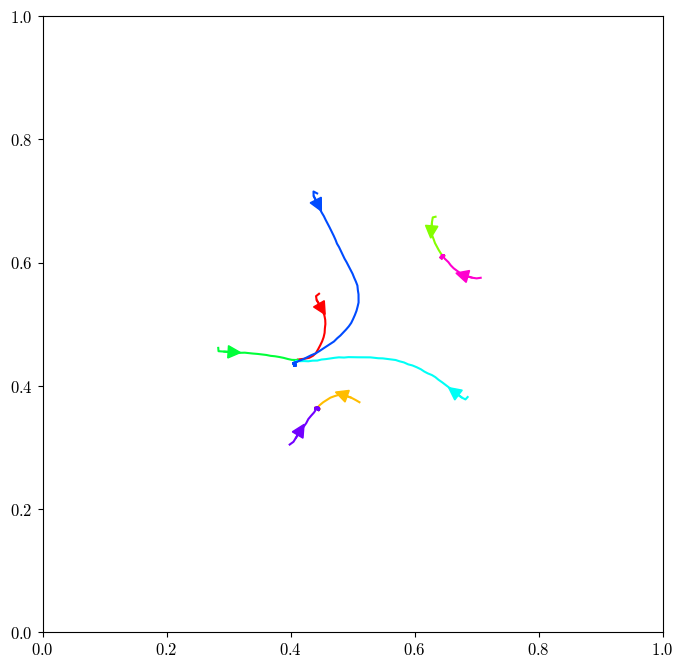

/Users/oscardewit/ants_repo/SDE_particle/model2.py:16: RuntimeWarning: divide by zero encountered in divide
  C = np.divide(1,E)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


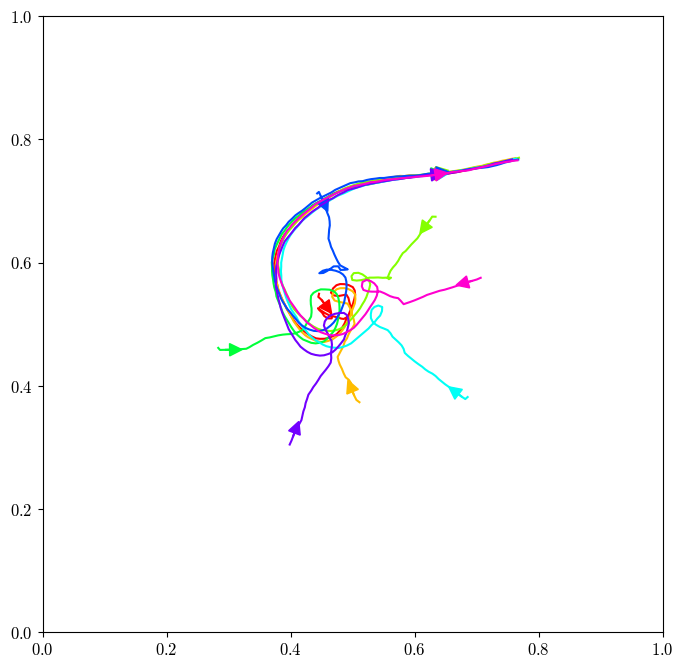

In [5]:
lmbds = [0.0,0.1]
DTs = [0.0001]
Ns = [8]
for N in Ns:
    for DT in DTs:
        for lmb in lmbds:
            for k in seeds:
                Xs, Ths = run_simul(pdC1,N,L,alpha,lmb,DTh,DT,v0,gamma,dt,steps,init,k)
                plot_curve(Xs,Ths,N,L,alpha,lmb,DTh,DT,v0,gamma,dt,steps,init,tag,k)

